# Creating a Python code that reads and manipulates a csv file without employing specific libraries such as pandas or the Python csv module

Reads the file with the training dataset and creates an array where each element is a line from the .csv file:

In [5]:
from matplotlib import pyplot as plt
from __future__ import division

train = open("./../../2 - Dados Preparados/train.csv","r")
data = [[line] for line in train]
train.close()

In [6]:
def readcsv(dataset,qualifier,delimiter):
    datatemp = []
    for i, content in enumerate(dataset):
        datatemp += [content[0].strip("\n").split(delimiter)]
        for j, element in enumerate(datatemp[i]):
            if qualifier in element:
                datatemp[i][j] = datatemp[i][j] + datatemp[i][j+1]
                datatemp[i][j] = datatemp[i][j].strip(qualifier)
                datatemp[i].pop(j+1)
    return datatemp    

data = readcsv(data, '"', ",")

In [7]:
datadict = {}
for col in data[0]:
    datadict[col]=[el[data[0].index(col)] for el in data[1:]]
    
#print(datadict)



In [8]:
survAge = [datadict["Age"],datadict["Survived"]]

Age = [float(el) for el in survAge[0]
               if el]

print("The age average among the passengers in the Titanic was " +str("%.1f" % (sum(Age)/len(Age))) +".")
#print(Age)
print("The oldest passenger on the ship was " + str(max(Age)) + " years old.")

#print(survAge)

The age average among the passengers in the Titanic was 29.7.
The oldest passenger on the ship was 80.0 years old.


In [9]:

ageRange=[0,5,10,15,21,31,41,51,61,71,81]
agePop = []
for i, el in enumerate(ageRange):
    if el != ageRange[-1]:
        agePop += [[ageRange[i+1],0,0]]
        for a, surv in zip(survAge[0],survAge[1]):
            if(a):
                if(surv):
                    if ((float(a) <= ageRange[i+1]) & (float(a)> ageRange[i])): 
                        agePop[i][1] += int(surv)
                        agePop[i][2] += 1

In [10]:
xs = [((ageRange[i]+ageRange[i+1])/2) for i, el in enumerate(ageRange)
                                      if el != ageRange[-1]]
ys = [y/z for k,y,z in agePop]
xt = [(ageRange[i+1]-ageRange[i]) -0.5 for i, el in enumerate(ageRange)
                                      if el != ageRange[-1]]

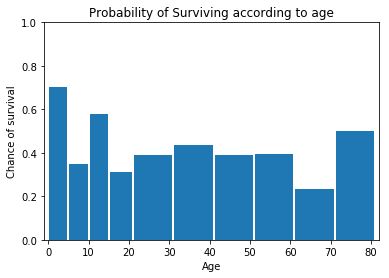

In [11]:
plt.bar(xs,ys,xt)
plt.xticks()
plt.title("Probability of Surviving according to age")
plt.xlabel("Age")
plt.ylabel("Chance of survival")
plt.axis([-1,82,0,1])
plt.show()

# I need to learn how to use RegEx